In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# ==================================== #
#  Constants
# ==================================== #

e = 1.602e-19                           #charge of a electron, C / electron volt, J
epsilon0 = 8.854e-12                    #vaccum dielectric constant, F/m
me = 9.109e-31                          #mass of a electron , kg
h = 6.626e-34                           #Planck constant, J*s 
hbar = h/(2*np.pi)
NA = 6.022e23
kb = 1.38e-23                            # Boltzmann constant, J/K
aB = 4*np.pi*epsilon0*hbar**2 / (me*e**2)# Bohr radius, m
Ry = 13.6                                # Ryberg, eV

cal2J = 4.184 
# ==================================== #
#  Metal Units <---> S.I. Units
# ==================================== #

J2eV = 6.2442e18
m2A = 1e10
gmol2g = 1/NA
kg2gmol = 1e3/gmol2g
s2ps = 1e12
s2fs = 1e15

cm2m = 1e-2
gcc2kgm3 = 1e-3/(cm2m**3)

bar2Pa = 1e5
kbar2GPa = 1e3*bar2Pa/1e9
Pa2GPa = 1e-9

kg2g=1e3
m2cm=1e2
mJ2J = 1e-3        

nm2A = 10

# ==================================== #
#  Atomic Units <---> Metal/S.I. Units
# ==================================== #

m2bohr = 1/aB
A2bohr = m2bohr/m2A
eV2Ry = 1/Ry

# ==================================== #
#  PHONON
# ==================================== #

c = 3*10**8                               # speed of light, m/s
omega2k = s2ps*1/(c) *cm2m                # 1/ps -> 1/cm

unit_trans = 1/ NA * (1 / m2cm * m2A) **3 
vpa2rho = (24.3050 + 15.9994) / NA / (1/m2A**3) / (m2cm**3)


from scipy.optimize import curve_fit

comp_dir = '/data/home/djy4/jupyter/MgO/EOS/OSF/compare/'


# kappa data from DPMD

In [3]:
# ====================
# PBEsol functional (p,rho,kappa) b1
# ====================

kappa_300k = np.array([
       [300., 300., ],
       [0.4, 14, ],
       [3.54154154, 3.83583584, ],
       [60.33436476239333 ,95.395553261695   ],
       [7.204797336250823,12.133404383342574,]]) 

kappa_2kk = np.array([
       [ 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000., 2000.],
       [10,20,30,40, 50, 100, 200, 300, 400, 500],
       [ 3.52752753, 3.73073073, 3.90590591, 4.06706707,
       4.20720721, 4.7957958 , 5.63663664, 6.27427427, 6.7997998 ,
       7.26226226],
       [6.765048066693334 ,10.461626017870001,12.457138026238331,14.243757513884999,17.999787126188668,36.62854729228267 ,69.35657958305734 ,98.27332622624266 ,129.89468462254334 ,155.76683677551583 ],
       [0.612031819761114,0.9931988522565502,1.1649619182020499,1.410254165584864,1.5183560092000763,2.9688730772534355,4.556136713494715,8.518463599358885,12.753557458569674, 15.906425718335903 ]])

kappa_4kk = np.array([
   [4000., 4000., 4000., 4000., 4000.],
   [100, 200, 300, 400, 500],
   [4.66266266, 5.53153153, 6.17617618, 6.71571572, 7.18518519],               
   [ 11.488658247568   ,23.951826283826666,36.785489816235334,46.228033202535336,58.35046371722667 ],
   [ 1.0566219116845053,1.9681023046912625,3.149060732972281,3.599254237676721,4.704461471489108]])

kappa_6kk = np.array([
       [6000., 6000., 6000., 6000., 6000.],
       [100, 200, 300, 400, 500],
       [4.51551552, 5.41241241, 6.08508509, 6.63863864, 7.10810811],
       [5.151648240104667 ,12.498287844828667,18.497239687792664,24.748800654683333,30.148921084568666],
       [0.42557481205499537,1.1835173804704164,1.3722904518275638,1.8395000927187686,2.2988502391753207]])
#
data_b1 = np.hstack([kappa_300k, kappa_2kk, kappa_4kk, kappa_6kk])

# ====================
# PBEsol functional (p,rho,kappa) b2
# ====================

k_b2_2kk = np.array([
    [2000., 2000., 2000., 2000., 2000.],
    [400, 450, 500, 550, 600],
    [7.08708709, 7.33933934, 7.57757758, 7.8018018 , 8.01201201],
    [30.88044341496417 ,33.249161427085   ,40.87283534875667 ,45.632996684185834,53.94943040201583 ],
    [2.603268034697101,3.0817767750417064,4.642592667428634,4.579160135394465,5.724020264324473 ]
])
k_b2_4kk = np.array([
    [4000., 4000., 4000., 4000., 4000.],
    [400, 450, 500, 550, 600],
    [6.96796797, 7.22722723, 7.47247247, 7.7037037 , 7.92092092],
    [ 13.184301523621667,15.326978639503334,17.525154735414166,19.231844526176666,22.4001204442475 ],
    [1.1346463504580502,1.5725303772485963,1.7049659460253856,1.9264686574404413,2.3544829828716574]
])
k_b2_6kk = np.array([
    [6000., 6000., 6000., 6000., 6000.],
    [400, 450, 500, 550, 600],
    [6.85585586, 7.12212212, 7.36736737, 7.5985986 , 7.82282282],
    [ 8.419335743545833 ,10.018198514006668,9.865929928875834 ,12.3350610574925  ,13.117145521300833],    
    [0.9365480656016626,0.9797371501007014,0.9087442950116846,1.0741314542321314,1.3802354512279684]
])

data_b2 = np.hstack([k_b2_2kk, k_b2_4kk, k_b2_6kk])


# validate model

## Figure-S4 - compare kappa-density results with previous theoretical estimation

7.26226226 80.60719650069743 7.214028128461538 74.52910314390118 6.078093356796245
7.18518519 40.67928594912873 7.137939226025641 36.589457734449 4.089828214679734
7.10810811 27.273693993714602 7.061850313717949 23.94338524036579 3.330308753348813


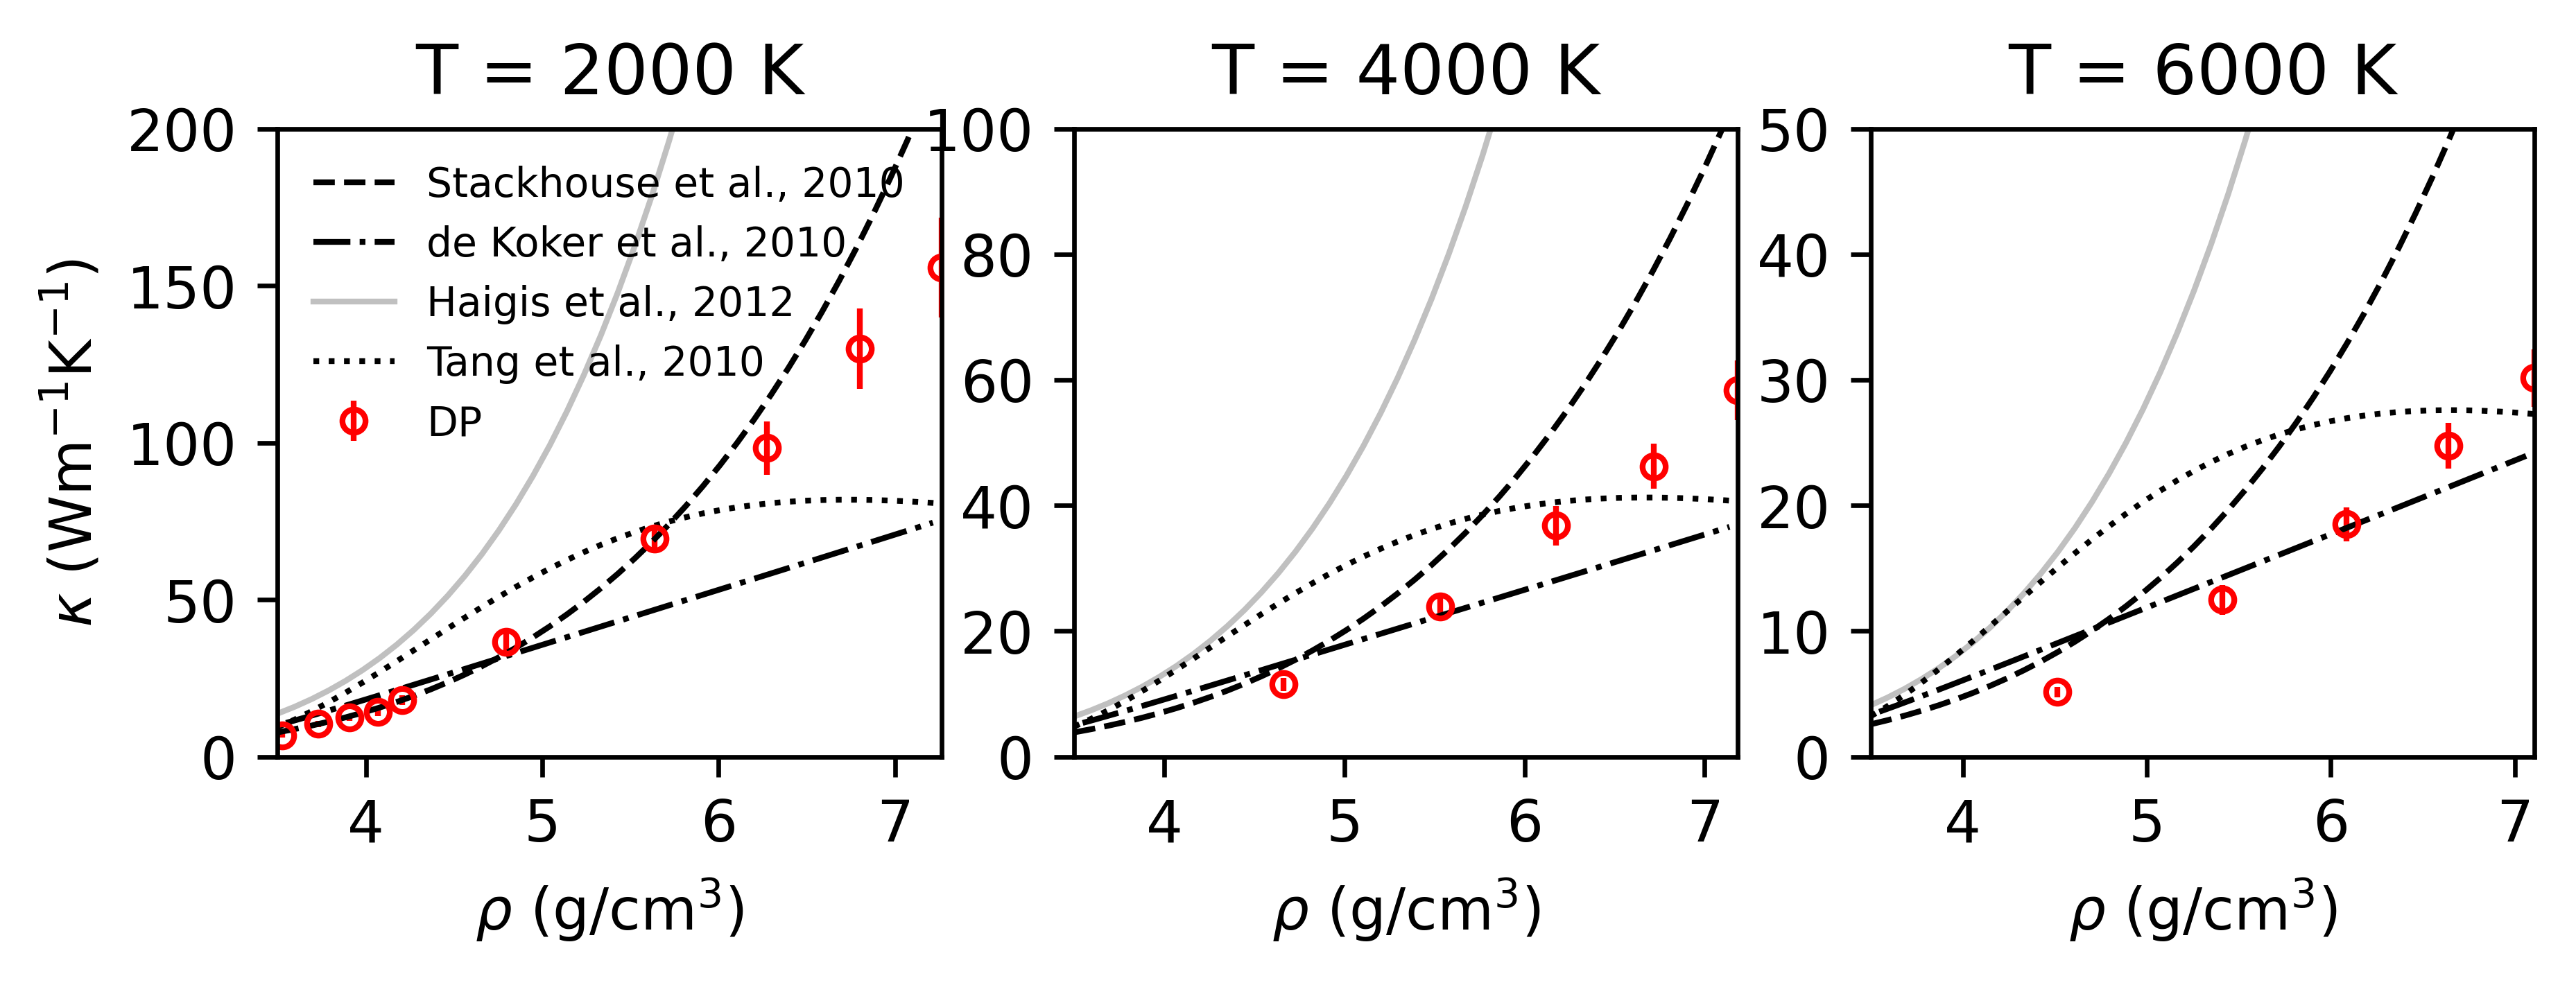

In [8]:
def tang_kappa(X):
    
    rho, temp = X
    
    a0 = -17.5
    a1 = 80.07815
    a2 = -132.02510
    b0 = -9.30500
    b1 = -35.90633
    b2 = 118.58743
    
    A = np.exp(a0 + a1 / rho + a2 / rho**2 ) 
    B = np.exp(b0 + b1 / rho + b2 / rho**2 )
    
    return 1/(A + B * temp)


def stackhouse_kappa(X):
    rho, temp = X
    a = 4.6
    
    y = 5.9 * pow(rho / 3.3, a) * (2000 / temp)
    y_b = 5.9 * pow(rho / 3.3, a - 1.2) * (2000 / temp)
    y_t = 5.9 * pow(rho / 3.3, a + 1.2) * (2000 / temp)
    return y, y_b, y_t
    

def dekoker_kappa(X):
    rho, temp = X
    
    T0 = 2000
    rho0 = 3.30
    gamma0 = 1.49
    dgamma0 = 6 * gamma0
    q0 = 1.27
    dgamma1 = - 3 * dgamma0 * q0 + dgamma0 ** 2 - 2 * dgamma0

    f = 1/2 * (pow( rho/rho0, 2/3) - 1)
    gamma = (dgamma0 + (2 * dgamma0 + dgamma1) * f + 2 * dgamma1 * f**2 ) / (3 * ( 2+ 2 * dgamma0 * f + dgamma1 * f**2))


    dgamma_drho = (gamma[1:] - gamma[:-1])/(rho[1:] - rho[:-1])
    rho_c = (rho[1:] + rho[:-1])/2
    gamma_c = (gamma[1:] + gamma[:-1])/2
    q = - rho_c / gamma_c * dgamma_drho

    g = 3* gamma_c + 2 * q - 1/3

    kappa0 = 7.01
    
    return rho_c, kappa0 * pow(rho_c / rho0, g) *  T0 / temp[1:]

def haigis_kappa(X):
    rho, temp = X  
    
    kappa0 = 129
    rho0   = 3.602
    T0     = 300
    
    a = 5.42
    b = 1.10
    
    return kappa0 * pow(rho/rho0, a ) *pow(T0/temp, b)
    


def prac_formula(X,  beta, b, c):
    rho, temp = X
    T0 = 300
    rho0 = 3.5407
    kappa0 = 55.2
    
    g = b * np.log(rho / rho0) + c
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)

rho0 = 3.5407
kappa0 = 55.2

p_est, err_est = curve_fit(prac_formula, 
                        xdata=(data_b1[2], data_b1[0]), 
                        ydata=data_b1[3], maxfev=5000)


fig, ax1 = plt.subplots(1,3,figsize=(7,2),dpi=600)

kappa_list = [kappa_300k, kappa_2kk, kappa_4kk, kappa_6kk]
temp_list  = [300, 2000, 4000, 6000]

for idx in range(3):
    
    ax = ax1[idx]
    
    kappa = kappa_list[idx + 1]
    temp  = temp_list[idx + 1]
    
    ax.errorbar( kappa[2], kappa[3], yerr= kappa[4],
           fmt='o', mfc='none', #color=cl[1+idx],
           color = 'r', ms=4, mew=1.0, lw=1.0, label='DP')
    
    xx = np.linspace(3.5, np.max(kappa[2]), 40)
    tt = np.ones(xx.shape)*temp
    # ==============================
    # comparison
    # ==============================

    yy, y_b, y_t = stackhouse_kappa((xx, tt))
    ax.plot(xx, yy,'--', color='k', lw=1.0, label='Stackhouse et al., 2010') #Ref. [14]') #
    
    xc, yc = dekoker_kappa((xx, tt))
    ax.plot(xc, yc,'-.', color='k', lw=1.0, label='de Koker et al., 2010') #Ref. [12]')#
    
    yy = haigis_kappa((xx, tt))
    ax.plot(xx, yy,'-', color='silver', lw=1.0, label='Haigis et al., 2012')
    
    yy = tang_kappa((xx, tt))
    ax.plot(xx, yy,':', color='k', lw=1.0, label='Tang et al., 2010') #Ref. [11]')#
   
    #ax.fill_between(xx, y_b, y_t, facecolor='dodgerblue', alpha=0.1)#, label='Stackhouse et al.')
    
    print(xx[-1], yy[-1], xc[-1], yc[-1], yy[-1]-yc[-1])
    
    #yy = expt_kappa((xx, tt))
    #ax.plot(xx, yy,'-', color='k', label='Expt.')

    
    ax.set_title('T = %.d K'%temp)
    
    #ax.set_ylim([50,0,0,0][idx], [200, 200, 100, 50][idx])
    ax.set_ylim([0,0,0][idx], [200, 100, 50][idx])
    
    ax.set_xlim(3.5, np.max(kappa[2]))
    ax.set_xlabel('$\\rho$ ($\\rm{g/cm^3}$)')
    
    ax.set_xticks([4, 5, 6, 7])
    
    if idx == 0:
        ax.legend(fontsize=7,  frameon=False)#, shadow=True)
        ax.set_ylabel('$\kappa$ ($\\rm{Wm^{-1}K^{-1}}$)')

## Figure-S5(a) comparing different model (b1)

B1 phase, rho0, kappa0 is set to:  3.5407 55.2
b, c :  [-1.68033742  5.19748128]
error of b, c:  [0.65644233 0.43734637]
beta = 1, RMSE: 6.5746 W/ m K; relative RMSE : 23.1028 %

beta, b, c :  [ 1.33480181 -3.58023275  7.51996272]
error of beta, b, c:  [0.03202101 0.29124555 0.26110055]
constant beta, RMSE: 2.4387 W/ m K; relative RMSE : 10.8913 %

b, c, e, f :  [-2.33233958  6.95666276  0.47795912  1.10826072]
error of b, c, e, f:  [0.25433029 0.17299435 0.0737323  0.03749575]
density-depedent beta, RMSE: 1.1832 W/ m K; relative RMSE : 5.3282  %


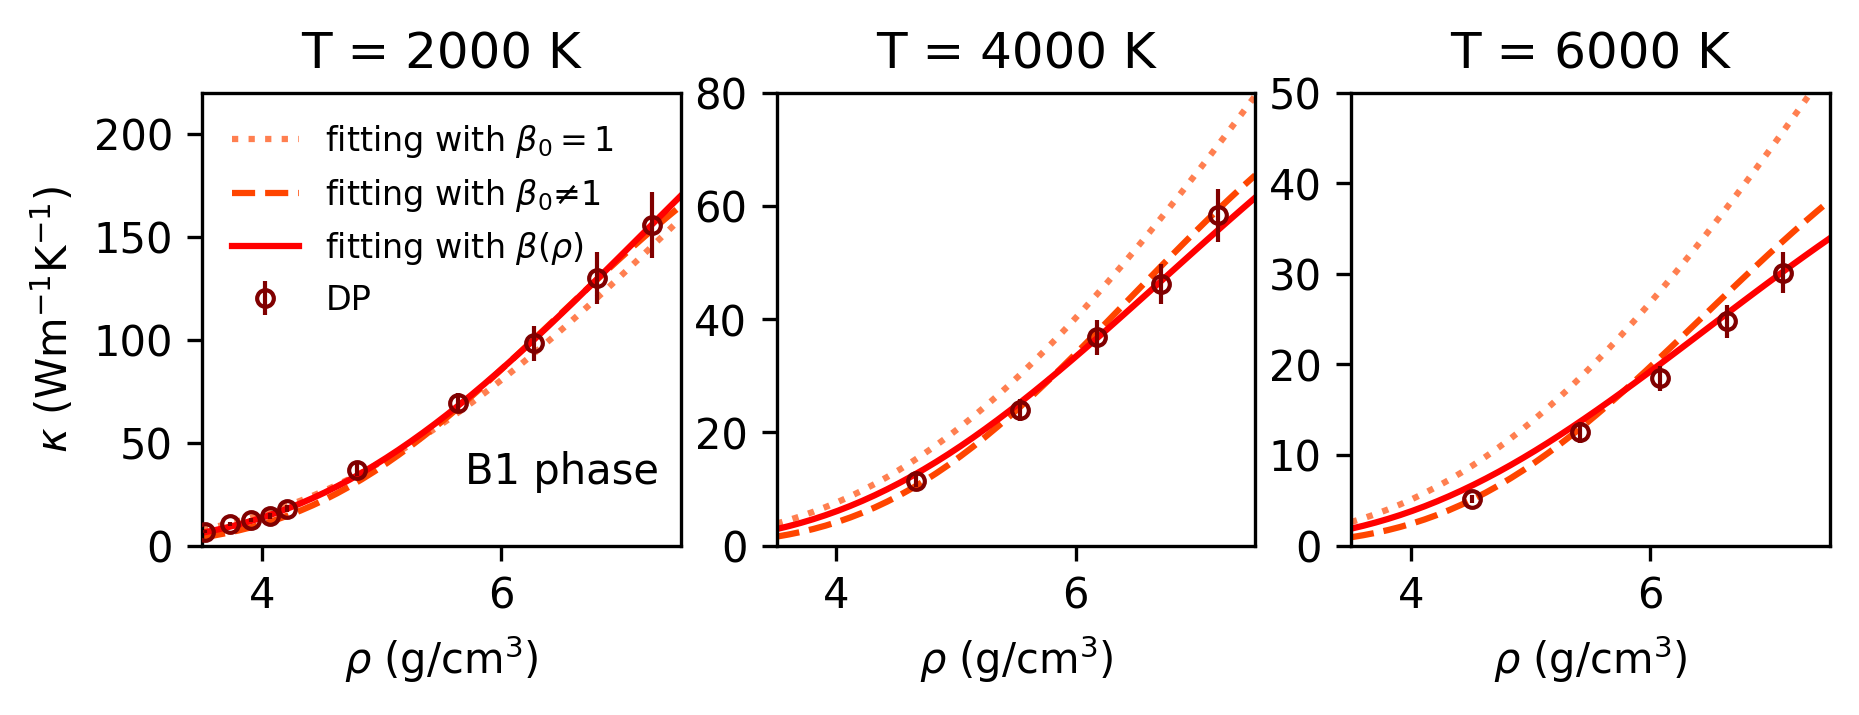

In [10]:
def prac_formula_0(X,  b, c):
    rho, temp = X
    T0 = 300
    rho0 = 3.5407
    kappa0 = 55.2
    
    g = b * np.log(rho / rho0) + c
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp,1)


def prac_formula(X,  beta, b, c):
    rho, temp = X
    T0 = 300
    rho0 = 3.5407
    kappa0 = 55.2
    
    g = b * np.log(rho / rho0) + c
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)

def prac_formula_2(X,  b, c, e, f):
    rho, temp = X
    T0 = 300
    rho0 = 3.5407
    kappa0 = 55.2
    
    g = b * np.log(rho / rho0) + c
    beta = e * np.log(rho / rho0) + f
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)

def get_rmse(y, y_pred):
    
    return np.average(np.sqrt((y - y_pred)**2)), np.average(   np.sqrt((y - y_pred)**2) / y  *100 ) 


rho0 = 3.5407
kappa0 = 55.2

print('B1 phase, rho0, kappa0 is set to: ', rho0, kappa0)

p_est_0, p_cov = curve_fit(prac_formula_0, 
                        xdata=(data_b1[2], data_b1[0]), 
                        ydata=data_b1[3], maxfev=5000)

p_err_0 = np.sqrt(np.diag(p_cov))

print('b, c : ',p_est_0)
print('error of b, c: ', p_err_0)

y_pred = prac_formula_0((data_b1[2], data_b1[0]), *p_est_0)
rmse,rrmse   = get_rmse(data_b1[3], y_pred)

#print(rrmse )
print('beta = 1, RMSE: %.4f W/ m K; relative RMSE : %.4f'%(rmse,rrmse)+' %\n')


# ================================================
p_est, p_cov = curve_fit(prac_formula, 
                        xdata=(data_b1[2], data_b1[0]), 
                        ydata=data_b1[3], maxfev=5000)

p_err = np.sqrt(np.diag(p_cov))

print('beta, b, c : ',p_est)
print('error of beta, b, c: ', p_err)


y_pred = prac_formula((data_b1[2], data_b1[0]), *p_est)
rmse,rrmse   = get_rmse(data_b1[3], y_pred)

#print(rrmse )
print('constant beta, RMSE: %.4f W/ m K; relative RMSE : %.4f'%(rmse,rrmse)+' %\n')

# ================================================

p_est_2, p_cov_2 = curve_fit(prac_formula_2, 
                        xdata=(data_b1[2], data_b1[0]), 
                        ydata=data_b1[3], maxfev=5000)

p_err_2 = np.sqrt(np.diag(p_cov_2))

print('b, c, e, f : ',p_est_2)
print('error of b, c, e, f: ', p_err_2)


y_pred = prac_formula_2((data_b1[2], data_b1[0]), *p_est_2)
rmse,rrmse   = get_rmse(data_b1[3], y_pred)
print('density-depedent beta, RMSE: %.4f W/ m K; relative RMSE : %.4f '%(rmse,rrmse)+' %')

#print(rrmse )

fig, ax1 = plt.subplots(1,3,figsize=(7,2),dpi=300)

kappa_list = [ kappa_2kk, kappa_4kk, kappa_6kk]
temp_list  = [2000, 4000, 6000]

for idx in range(3):
    
    ax = ax1[idx]
    
    kappa = kappa_list[idx ]
    temp  = temp_list[idx ]
    
    ax.errorbar( kappa[2], kappa[3], yerr= kappa[4],
           fmt='o', mfc='none', #color=cl[1+idx],capsize=2,
           color = 'maroon', ms=4,  mew=1.0, lw=1.0,label='DP', zorder=4)
    
    xx = np.linspace(3.5, 7.5, 40)
    tt = np.ones(xx.shape)*temp
    
    yy = prac_formula_0((xx, tt), *p_est_0)
    y2 = prac_formula_0((xx, tt), *p_est_0+p_err_0)
    
    # ax.errorbar(xx, yy, yerr= y2 - yy,
    #             fmt='-', mfc='none', mew=1.0, ms=4,
    #             color='dimgray',lw=1.0, alpha=0.4, label='fit with $\\beta_0$')
    ax.plot(xx, yy, ':', mfc='none', mew=1.0, ms=4,
                color='coral',lw=1.5, alpha=1.0, label='fitting with $\\beta_0=1$')
    
    
    
    yy = prac_formula((xx, tt), *p_est)
    y2 = prac_formula((xx, tt), *p_est+p_err)
    
    # ax.errorbar(xx, yy, yerr= y2 - yy,
    #             fmt='-', mfc='none', mew=1.0, ms=4,
    #             color='dimgray',lw=1.0, alpha=0.4, label='fit with $\\beta_0$')
    ax.plot(xx, yy, '--', mfc='none', mew=1.0, ms=4,
                color='orangered',lw=1.5, alpha=1.0, label='fitting with $\\beta_0\\ne 1$')
    
    yy2 = prac_formula_2((xx, tt), *p_est_2)
    y2  = prac_formula_2((xx, tt), *p_est_2+p_err_2)
    
    #ax.errorbar(xx, yy2, yerr= y2 - yy2,
    #            fmt='-', mfc='none', mew=1.0, ms=4,
    #            color='r',lw=1.0, alpha=0.4, label='fit with $\\beta (\\rho)$')
    ax.plot(xx, yy2, '-', mfc='none', mew=1.0, ms=4,
                color='r',lw=1.5, alpha=1.0, label='fitting with $\\beta (\\rho)$')
    
        
    ax.set_title('T = %.d K'%temp)
    
    #ax.set_ylim([50,0,0,0][idx], [200, 200, 100, 50][idx])
    ax.set_ylim([0,0,0][idx], [220, 80, 50][idx])
    
    ax.set_xlim(3.5, 7.5)
    
    #print(np.max(kappa[2]))
    ax.set_xlabel('$\\rho$ ($\\rm{g/cm^3}$)')
    
    if idx == 0:
        
        ax.set_ylabel('$\kappa\ {\\rm (W m^{-1}K^{-1})}$')
        
    #if idx == 0:
        ax.text(5.7, 30, 'B1 phase')
        ax.legend(fontsize=8, frameon=False)

## Figure-S5(b) comparing different model (b2)

B2 phase, rho0, kappa0 is set to:  7.09 30.88
b, c :  [18.26187964  2.18375529]
error of b, c:  [7.34037658 0.79097802]
beta = 1, RMSE: 1.2067 W/ m K; relative RMSE : 7.4271 %

beta, b, c :  [ 1.12638536 13.72548279  2.84698212]
error of beta, b, c:  [0.02003663 3.6503162  0.3993347 ]
constant beta, RMSE: 0.5259 W/ m K; relative RMSE : 2.9224 %

b, c, e, f :  [13.14097824  2.93175804  0.46303119  1.10127913]
error of b, c, e, f:  [3.65463272 0.40298503 0.43349953 0.0303757 ]
density-depedent beta, RMSE: 0.4765 W/ m K; relative RMSE : 2.6645  %


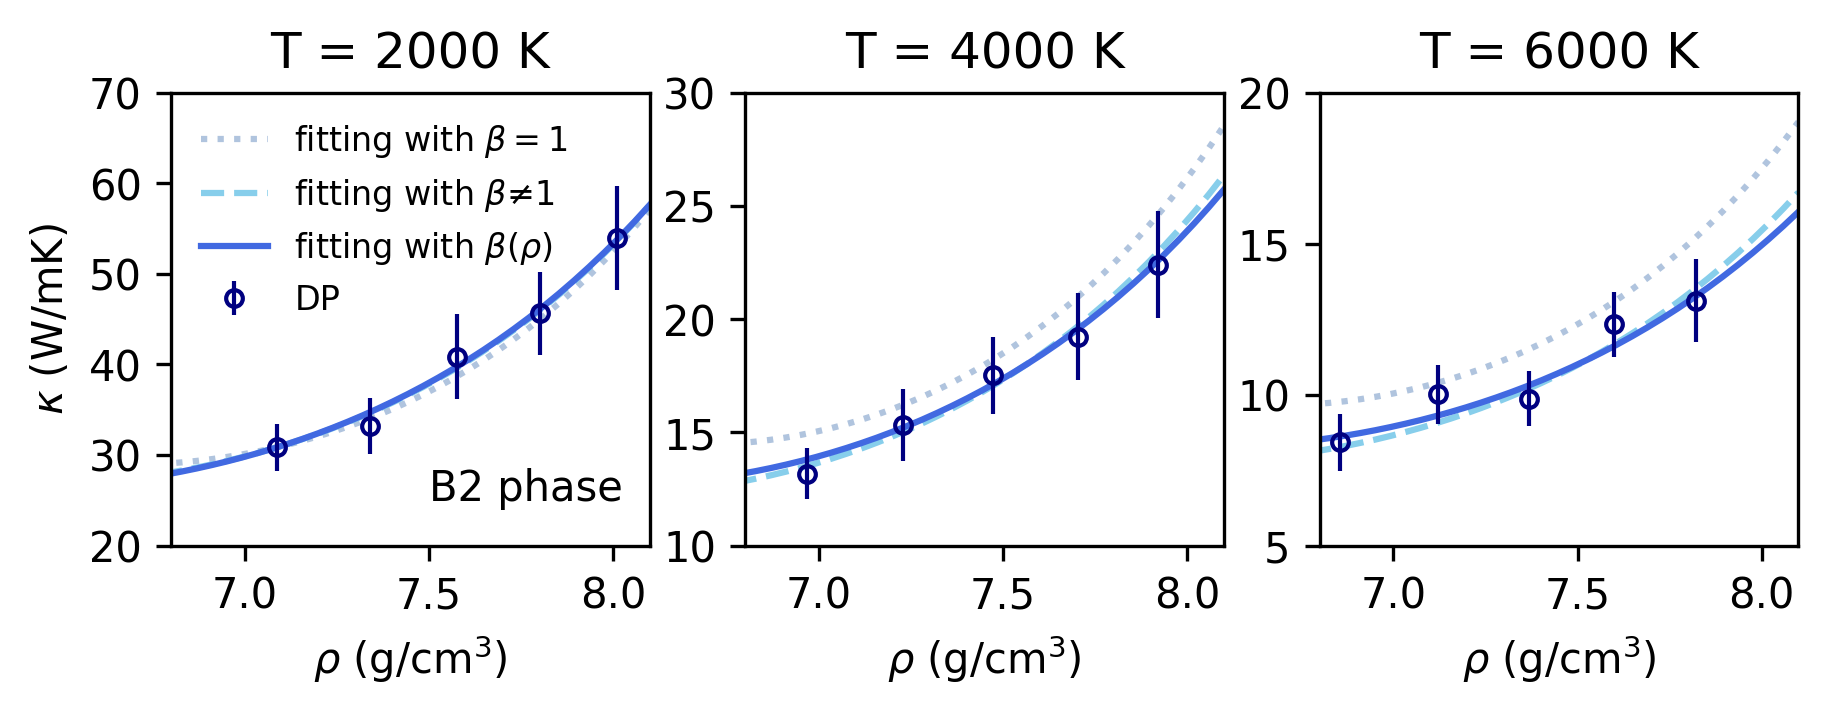

In [12]:
def prac_formula_0(X,   b, c):
    rho, temp = X
    T0 = 2000
    rho0 = 7.09
    kappa0 = 30.88
    
    g = b * np.log(rho / rho0) + c
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, 1)

def prac_formula(X,  beta, b, c):
    rho, temp = X
    T0 = 2000
    rho0 = 7.09
    kappa0 = 30.88
    
    g = b * np.log(rho / rho0) + c
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)

def prac_formula_2(X,  b, c, e, f):
    rho, temp = X
    T0 = 2000
    rho0 = 7.09
    kappa0 = 30.88
    
    g = b * np.log(rho / rho0) + c
    beta = e * np.log(rho / rho0) + f
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)

def get_rmse(y, y_pred):
    
    return np.average(np.sqrt((y - y_pred)**2)), np.average(   np.sqrt((y - y_pred)**2) / y  *100 ) 


rho0 = 7.09
kappa0 = 30.88

print('B2 phase, rho0, kappa0 is set to: ', rho0, kappa0)

p_est_0, p_cov = curve_fit(prac_formula_0, 
                        xdata=(data_b2[2], data_b2[0]), 
                        ydata=data_b2[3], maxfev=5000)

p_err_0 = np.sqrt(np.diag(p_cov))

print('b, c : ',p_est_0)
print('error of b, c: ', p_err_0)

y_pred = prac_formula_0((data_b2[2], data_b2[0]), *p_est_0)
rmse,rrmse   = get_rmse(data_b2[3], y_pred)

#print(rrmse )
print('beta = 1, RMSE: %.4f W/ m K; relative RMSE : %.4f'%(rmse,rrmse)+' %\n')


p_est, p_cov = curve_fit(prac_formula, 
                        xdata=(data_b2[2], data_b2[0]), 
                        ydata=data_b2[3], maxfev=5000)

p_err = np.sqrt(np.diag(p_cov))

print('beta, b, c : ',p_est)
print('error of beta, b, c: ', p_err)

y_pred = prac_formula((data_b2[2], data_b2[0]), *p_est)
rmse,rrmse   = get_rmse(data_b2[3], y_pred)

#print(rrmse )
print('constant beta, RMSE: %.4f W/ m K; relative RMSE : %.4f'%(rmse,rrmse)+' %\n')

p_est_2, p_cov_2 = curve_fit(prac_formula_2, 
                        xdata=(data_b2[2], data_b2[0]), 
                        ydata=data_b2[3], maxfev=5000)

p_err_2 = np.sqrt(np.diag(p_cov_2))

print('b, c, e, f : ',p_est_2)
print('error of b, c, e, f: ', p_err_2)


y_pred = prac_formula_2((data_b2[2], data_b2[0]), *p_est_2)
rmse,rrmse   = get_rmse(data_b2[3], y_pred)
print('density-depedent beta, RMSE: %.4f W/ m K; relative RMSE : %.4f '%(rmse,rrmse)+' %')

#print(rrmse )

fig, ax1 = plt.subplots(1,3,figsize=(7,2),dpi=300)

kappa_list = [k_b2_2kk, k_b2_4kk, k_b2_6kk]
temp_list  = [2000, 4000, 6000]

for idx in range(3):
    
    ax = ax1[idx]
    
    kappa = kappa_list[idx ]
    temp  = temp_list[idx ]
    
    ax.errorbar( kappa[2], kappa[3], yerr= kappa[4],
           fmt='o', mfc='none', #color=cl[1+idx],capsize=2,
           color = 'navy', ms=4,  mew=1.0, lw=1.0,label='DP', zorder=4)
    
    xx = np.linspace(6.5, 8.1, 40)
    tt = np.ones(xx.shape)*temp
    
    yy = prac_formula_0((xx, tt), *p_est_0)
    ax.plot(xx, yy, ':', mfc='none', mew=1.0, ms=4,
                color='lightsteelblue',lw=1.5, alpha=1.0, label='fitting with $\\beta = 1$')
    
    
    yy = prac_formula((xx, tt), *p_est)
    y2 = prac_formula((xx, tt), *p_est+p_err)

    ax.plot(xx, yy, '--', mfc='none', mew=1.0, ms=4,
                color='skyblue',lw=1.5, alpha=1.0, label='fitting with $\\beta \\ne 1$')
    
    yy2 = prac_formula_2((xx, tt), *p_est_2)
    y2  = prac_formula_2((xx, tt), *p_est_2+p_err_2)

    ax.plot(xx, yy2, '-', mfc='none', mew=1.0, ms=4,
                color='royalblue',lw=1.5, alpha=1.0, label='fitting with $\\beta (\\rho)$')
    
        
    ax.set_title('T = %.d K'%temp)
    
    #ax.set_ylim([50,0,0,0][idx], [200, 200, 100, 50][idx])
    ax.set_ylim([20,10,5][idx], [70, 30, 20][idx])
    
    ax.set_xlim(6.8, 8.1)
    ax.set_xlabel('$\\rho$ ($\\rm{g/cm^3}$)')
    
    if idx == 0:
        ax.legend(fontsize=8, frameon=False)
        ax.set_ylabel('$\kappa$ ($\\rm{W/mK}$)')
        
        ax.text(7.5,25,'B2 phase')

## Figure-3 comparing g and beta

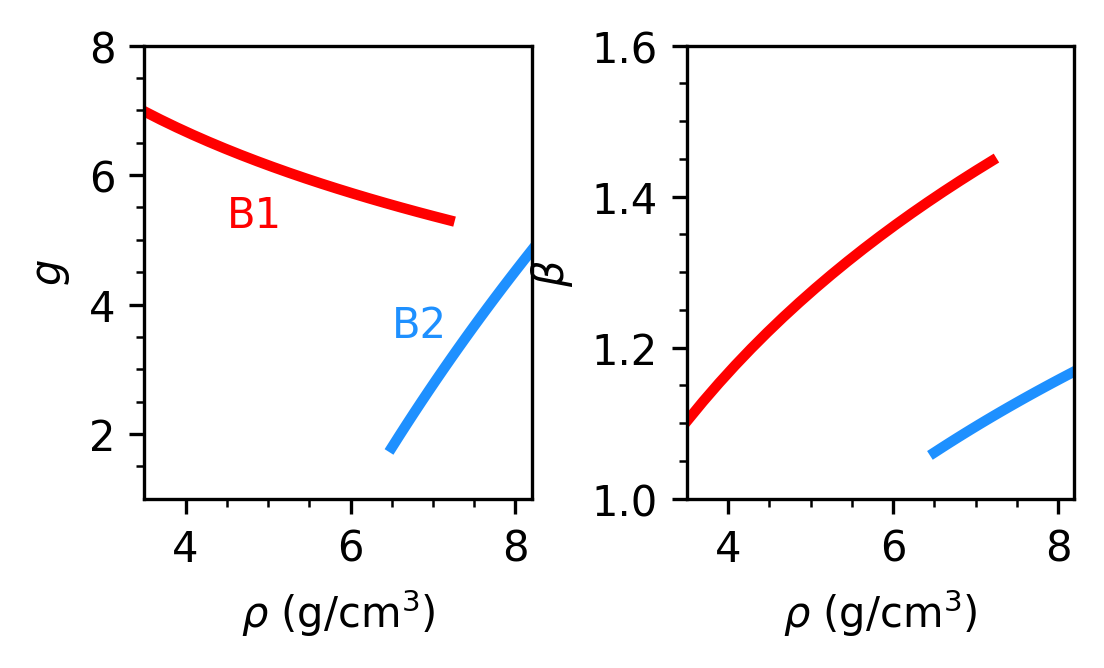

In [13]:
def prac_formula_b1(X,  beta, b, c):
    rho, temp = X
    T0 = 300
    rho0 = 3.5407
    kappa0 = 55.2
    
    g = b * np.log(rho / rho0) + c
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)

def prac_formula_b1_2(X,  b, c, e, f):
    rho, temp = X
    T0 = 300
    rho0 = 3.5407
    kappa0 = 55.2
    
    g = b * np.log(rho / rho0) + c
    beta = e * np.log(rho / rho0) + f
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)

def prac_formula_b2(X,  beta, b, c):
    rho, temp = X
    T0 = 2000
    rho0 = 7.09
    kappa0 = 30.88
    
    g = b * np.log(rho / rho0) + c
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)

def prac_formula_b2_2(X,  b, c, e, f):
    rho, temp = X
    T0 = 2000
    rho0 = 7.09
    kappa0 = 30.88
    
    g = b * np.log(rho / rho0) + c
    beta = e * np.log(rho / rho0) + f
    
    return kappa0 * pow(rho / rho0, g) * pow(T0 / temp, beta)


def get_rmse(y, y_pred):
    
    return np.average(np.sqrt((y - y_pred)**2)), np.average(   np.sqrt((y - y_pred)**2) / y  *100 ) 

def get_param(phase, mode):
    
    if phase == 'b1':

        if mode == 'const':
            p_est, p_cov = curve_fit(prac_formula_b1, 
                        xdata=(data_b1[2], data_b1[0]), 
                        ydata=data_b1[3], maxfev=5000)

            p_err = np.sqrt(np.diag(p_cov))

        else:
            

            p_est, p_cov = curve_fit(prac_formula_b1_2, 
                        xdata=(data_b1[2], data_b1[0]), 
                        ydata=data_b1[3], maxfev=5000)

            p_err = np.sqrt(np.diag(p_cov))

    elif phase == 'b2':
        
        if mode == 'const':
            p_est, p_cov = curve_fit(prac_formula_b2, 
                        xdata=(data_b2[2], data_b2[0]), 
                        ydata=data_b2[3], maxfev=5000)

            p_err = np.sqrt(np.diag(p_cov))

        else:
            

            p_est, p_cov = curve_fit(prac_formula_b2_2, 
                        xdata=(data_b2[2], data_b2[0]), 
                        ydata=data_b2[3], maxfev=5000)

            p_err = np.sqrt(np.diag(p_cov))
            
    return p_est, p_err

rho0 = [3.5407, 7.09]
xmin = [3.5, 6.5]
xmax = [7.2, 8.2]

fig, ax1 = plt.subplots(1,2, figsize=(4,2),dpi=300)

cl = ['r','dodgerblue']
ll = ['$\\beta(\\rho)$','']
for idx in range(2):

    xx = np.linspace(xmin[idx], xmax[idx], 20)

    for jdx in range(2):
        p_est, p_err = get_param(['b1','b2'][idx], ['const','rho'][jdx])

        if jdx == 0:
            beta, b, c = p_est
            beta_err, b_err, c_err = p_err

            #beta = np.ones(xx.shape) * beta
            g = b * np.log(xx/rho0[idx]) + c

#             ax = ax1[0]
#             ax.plot(xx, g, color=['r','b'][idx], linestyle='--',
#                     lw=2.5, alpha=0.6, label=['$\\beta_0$',''][idx])
            
#             ax = ax1[1]
#             ax.plot(xx, np.ones(xx.shape)*beta, 
#                     color=['r','b'][idx], linestyle='--',
#                     lw=2.5, alpha=0.6)
            
            
        else:
            b, c, e, f = p_est
            b_err, c_err, e_err, f_err = p_err

            g = b * np.log(xx/rho0[idx]) + c
            g2 =  (b+b_err) * np.log(xx/rho0[idx]) + (c+c_err)
            
            ax = ax1[0]
            ax.plot(xx, g, color=cl[idx], linestyle='-',
                    lw=2.5, alpha=1, label=ll[idx])
            # ax.errorbar(xx, g, yerr=g2-g,
            #         color=cl[idx], linestyle='-',
            #         lw=1.5, capsize=2, alpha=0.4, label=ll[idx])

            beta = e * np.log(xx/rho0[idx]) + f
            beta2 = (e+e_err) * np.log(xx/rho0[idx]) + (f + f_err)
            ax = ax1[1]
            ax.plot(xx, beta, 
                    color=cl[idx], linestyle='-',
                    lw=2.5, alpha=1.0)
            
            # ax.errorbar(xx, beta, yerr=beta2-beta,
            #         color=cl[idx], linestyle='-',
            #         lw=1.5, capsize=2, alpha=0.4, label=ll[idx])

for jdx in range(2):
    
    ax = ax1[jdx]
    
    ax.set_xlim(3.5, 8.2)
    ax.set_xlabel('$\\rho$ ($\\rm{g/cm^3}$)')
    
    if jdx == 0:
        ax.text(4.5, 5.2,'B1', color=cl[0])
        ax.text(6.5, 3.5,'B2', color=cl[1])
        
        #ax.legend(loc=3, fontsize=8)
        ax.set_ylabel('$g$')
        ax.set_ylim(1,8)
    else:
        ax.set_ylim(1.0, 1.6)
        ax.set_ylabel('$\\beta$')
        
    ax.minorticks_on()
    
plt.subplots_adjust(wspace=0.4)